## 6.5 Unsupervised Machine Learning . Clastering

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### 1. Importing libraries and data and renaming columns

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans #importing the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [77]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [78]:
path = r'C:\Users\user\11-2023 Real Estate Sales Connecticut\Data'

In [79]:
df = pd.read_csv(os.path.join(path, 'Prepared Data','realestate_sold.csv'), index_col=0)

In [80]:
df.shape

(995367, 12)

In [81]:
df.head(3)

,Serial Number,List Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Year of Sale,Month of Sale,Sale_Amount_Zscore
0,2020348,2020,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,Non Residental,2021,9,-0.040765
1,20002,2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,2020,10,0.033112
2,200212,2020,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,2021,3,-0.142855


### Filtering the df because kmean function only with numerical variables

In [82]:
columns_to_keep=['Serial Number','List Year','Year of Sale', 'Month of Sale','Assessed Value', 'Sale Amount', 'Sales Ratio']
df1=df[columns_to_keep]

In [83]:
df1.shape

(995367, 7)

### 2. The elbow technique

In [84]:
num_cl = range(1, 15) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [85]:
score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

[-4.6714463132084625e+19,
 -1.1828500103632798e+19,
 -6.340051940534951e+18,
 -4.2256749745718477e+18,
 -2.560928300057283e+18,
 -1.8186288048173594e+18,
 -1.3294124165029084e+18,
 -1.0887145953845627e+18,
 -9.304698673331766e+17,
 -7.843887384119629e+17,
 -7.049990984412552e+17,
 -6.34231980729327e+17,
 -5.834211704874207e+17,
 -5.191308774361445e+17]

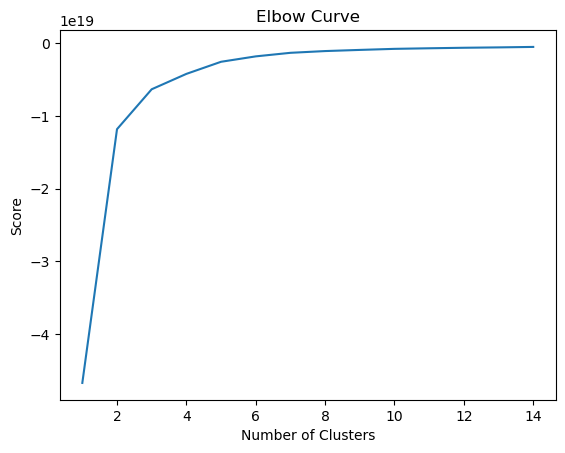

In [86]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a jump from four to five on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is five

### 3. k-means clustering

In [87]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 


In [88]:
# Fit the k-means object to the data.

kmeans.fit(df1)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [89]:
df1['clusters'] = kmeans.fit_predict(df1)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\AppData\Local\Temp\ipykernel_2716\865444660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['clusters'] = kmeans.fit_predict(df1)


In [90]:
df1.head()

,Serial Number,List Year,Year of Sale,Month of Sale,Assessed Value,Sale Amount,Sales Ratio,clusters
0,2020348,2020,2021,9,150500.0,325000.0,0.4630,0
1,20002,2020,2020,10,253000.0,430000.0,0.5883,0
2,200212,2020,2021,3,130400.0,179900.0,0.7248,0
3,200243,2020,2021,4,619290.0,890000.0,0.6958,0
4,200377,2020,2021,7,862330.0,1447500.0,0.5957,0


In [91]:
df1.iloc[990200:990205]

,Serial Number,List Year,Year of Sale,Month of Sale,Assessed Value,Sale Amount,Sales Ratio,clusters
992046,190736,2019,2020,6,54460.0,100000.0,0.5446,0
992047,190523,2019,2020,5,119200.0,135000.0,0.8830,0
992048,190001,2019,2019,10,128920.0,240000.0,0.5372,0
992049,1901740,2019,2020,9,350960.0,540000.0,0.6499,0
992050,190117,2019,2020,6,209330.0,300000.0,0.6978,0


In [92]:
df1['clusters'].value_counts().sort_index()

clusters
0    987512
1       868
2         2
3      6109
4       876
Name: count, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

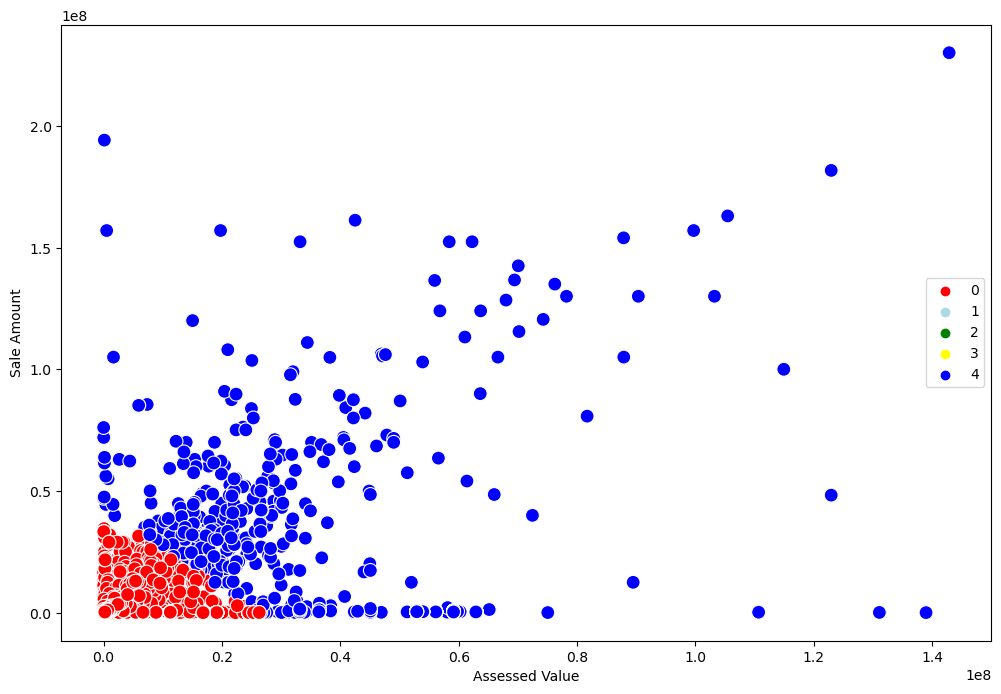

In [99]:
# Plot the clusters for the "'Sale Amount' and "'Assessed Value' variables.

# Define the color mapping for the clusters
cluster_colors = {0: 'red', 1: 'lightblue', 2: 'green', 3: 'yellow', 4: 'blue'}

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Assessed Value'], y=df1['Sale Amount'], hue=kmeans.labels_,palette=cluster_colors, s=100) 
# Here, I am subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points I need to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Assessed Value') # Label x-axis.
plt.ylabel('Sale Amount') # Label y-axis.
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

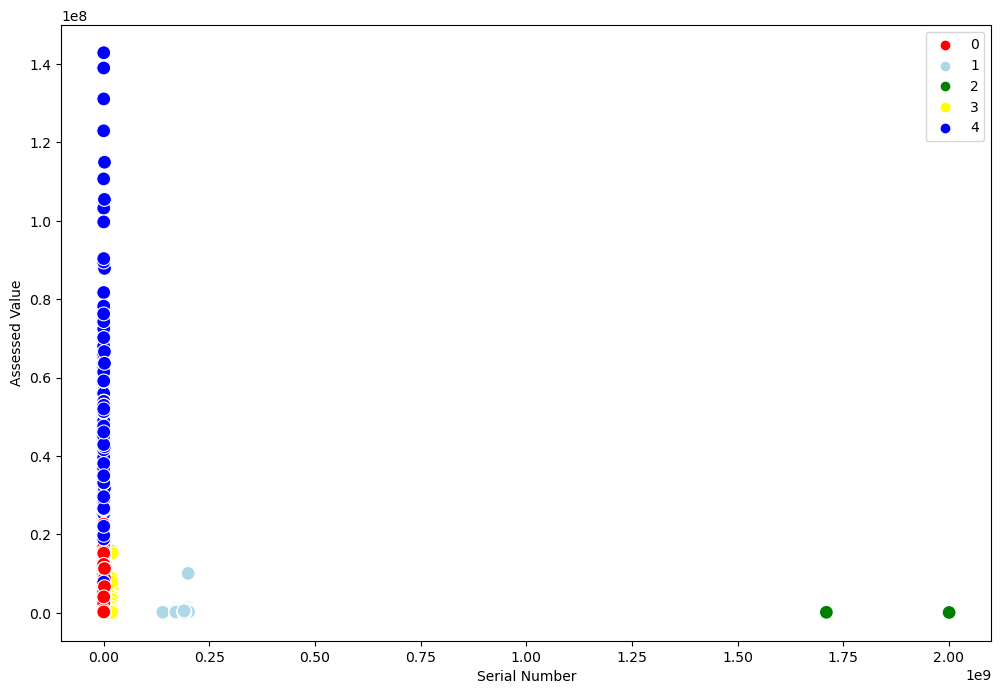

In [94]:
# Plot the clusters for the "Sale Amount" and "Serial Number" variables.
cluster_colors = {0: 'red', 1: 'lightblue', 2: 'green', 3: 'yellow', 4: 'blue'}
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Serial Number'], y=df1['Sale Amount'], hue=kmeans.labels_, palette=cluster_colors, s=100)

ax.grid(False) 
plt.xlabel('Serial Number') 
plt.ylabel('Sale Amount') 
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

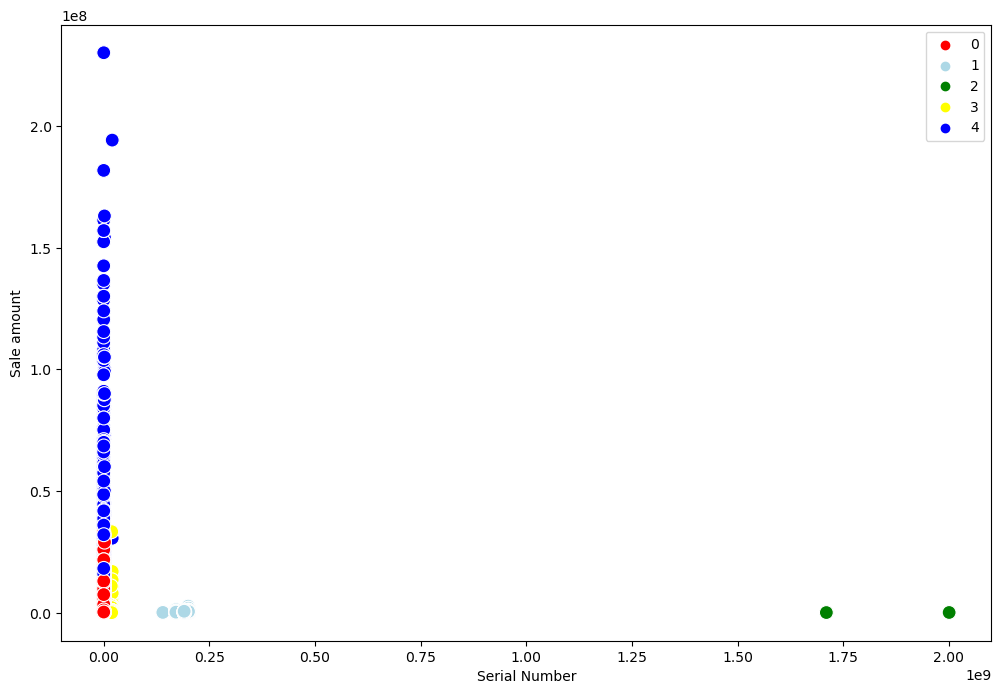

In [102]:
# Plot the clusters for the "Sale Amount" and "Serial Number" variables.
cluster_colors = {0: 'red', 1: 'lightblue', 2: 'green', 3: 'yellow', 4: 'blue'}
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Serial Number'], y=df1['Sale Amount'], hue=kmeans.labels_, palette=cluster_colors, s=100)

ax.grid(False) 
plt.xlabel('Serial Number') 
plt.ylabel('Sale amount') 
plt.show()

In [95]:
df1.loc[df1['clusters'] == 2, 'cluster'] = 'green'
df1.loc[df1['clusters'] == 3, 'cluster'] = 'yellow'
df1.loc[df1['clusters'] == 4, 'cluster'] = 'blue'
df1.loc[df1['clusters'] == 1, 'cluster'] = 'lightblue'
df1.loc[df1['clusters'] == 0, 'cluster'] = 'red' 

C:\Users\user\AppData\Local\Temp\ipykernel_2716\1778117329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[df1['clusters'] == 2, 'cluster'] = 'green'
C:\Users\user\AppData\Local\Temp\ipykernel_2716\1778117329.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'green' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df1.loc[df1['clusters'] == 2, 'cluster'] = 'green'


In [96]:
df1.groupby('cluster').agg({'Assessed Value':['mean', 'median', 'max', 'min'], 
                         'Sale Amount':['mean', 'median', 'max', 'min'], 
                         'Serial Number':['mean', 'median', 'max', 'min'],
                          'List Year':['mean', 'median', 'max', 'min']})

Assessed Value                                     Sale Amount  \
                    mean      median          max      min          mean   
cluster                                                                    
blue        3.692894e+07  34311200.0  142858700.0      0.0  2.397023e+07   
green       8.661000e+04     86610.0     111240.0  61980.0  8.600000e+04   
lightblue   1.972356e+05    154010.0   10044290.0    140.0  3.153567e+05   
red         2.459289e+05    138000.0   26279740.0      0.0  3.619826e+05   
yellow      2.408186e+05    187530.0   15288770.0      0.0  3.978281e+05   

                                           Serial Number                \
              median          max      min          mean        median   
cluster                                                                  
blue       1745508.0  230043624.0  18000.0  2.822952e+05  1.300110e+05   
green        86000.0     100000.0  72000.0  1.855256e+09  1.855256e+09   
lightblue   261000.0    2700000.0   4000.0  1.967783e+08  2.005000e+08   
red         225000.0   34534100.0      1.0  1.416966e+05  7.023900e+04   
yellow      319900.0   33300000.0   2000.0  1.879958e+07  1.916040e+07   

                                     List Year                      
                  max         min         mean  median   max   min  
cluster                                                             
blue         20200432       10097  2012.175799  2013.0  2020  2001  
green      2000500023  1710011174  2018.500000  2018.5  2020  2017  
lightblue   202000309   140002850  2019.576037  2020.0  2020  2014  
red           2020565          81  2010.139008  2010.0  2020  2001  
yellow       20300029    12000124  2018.718121  2019.0  2020  2012

### The claster analysis shows 2 outliers in serial numbers that compouse the green claster. this values can be valuted as mistaken and can be remooved from analysis. 
### The Serial number  special values are grouped in light blue cluster. This cluster is not shown in 'Sales Amount vs Assessed Value' scatterplot, therefore correspondent Real Estate has not any tendences by Sales Amount vs Assessed Value. Therefore it is reasonable to esclude serial number from unalysis even of special value group presence. 